# Lab 5: 2x3 Slider Puzzle

## Introduction
This notebook focuses on solving a 2x3 Slider Puzzle. The problem is a state-space search problem where each move of a tile results in a new state. Ideally, the puzzle is to be solved by a non-autonomous utility-based agent, which seeks a solution path with the least number of moves to reach the goal state. 

Group: FR1_Team 7 
Group members: Megan Phua, Khoo An Xian, Chua Yu Hui 
Submission Date: 13 Apr

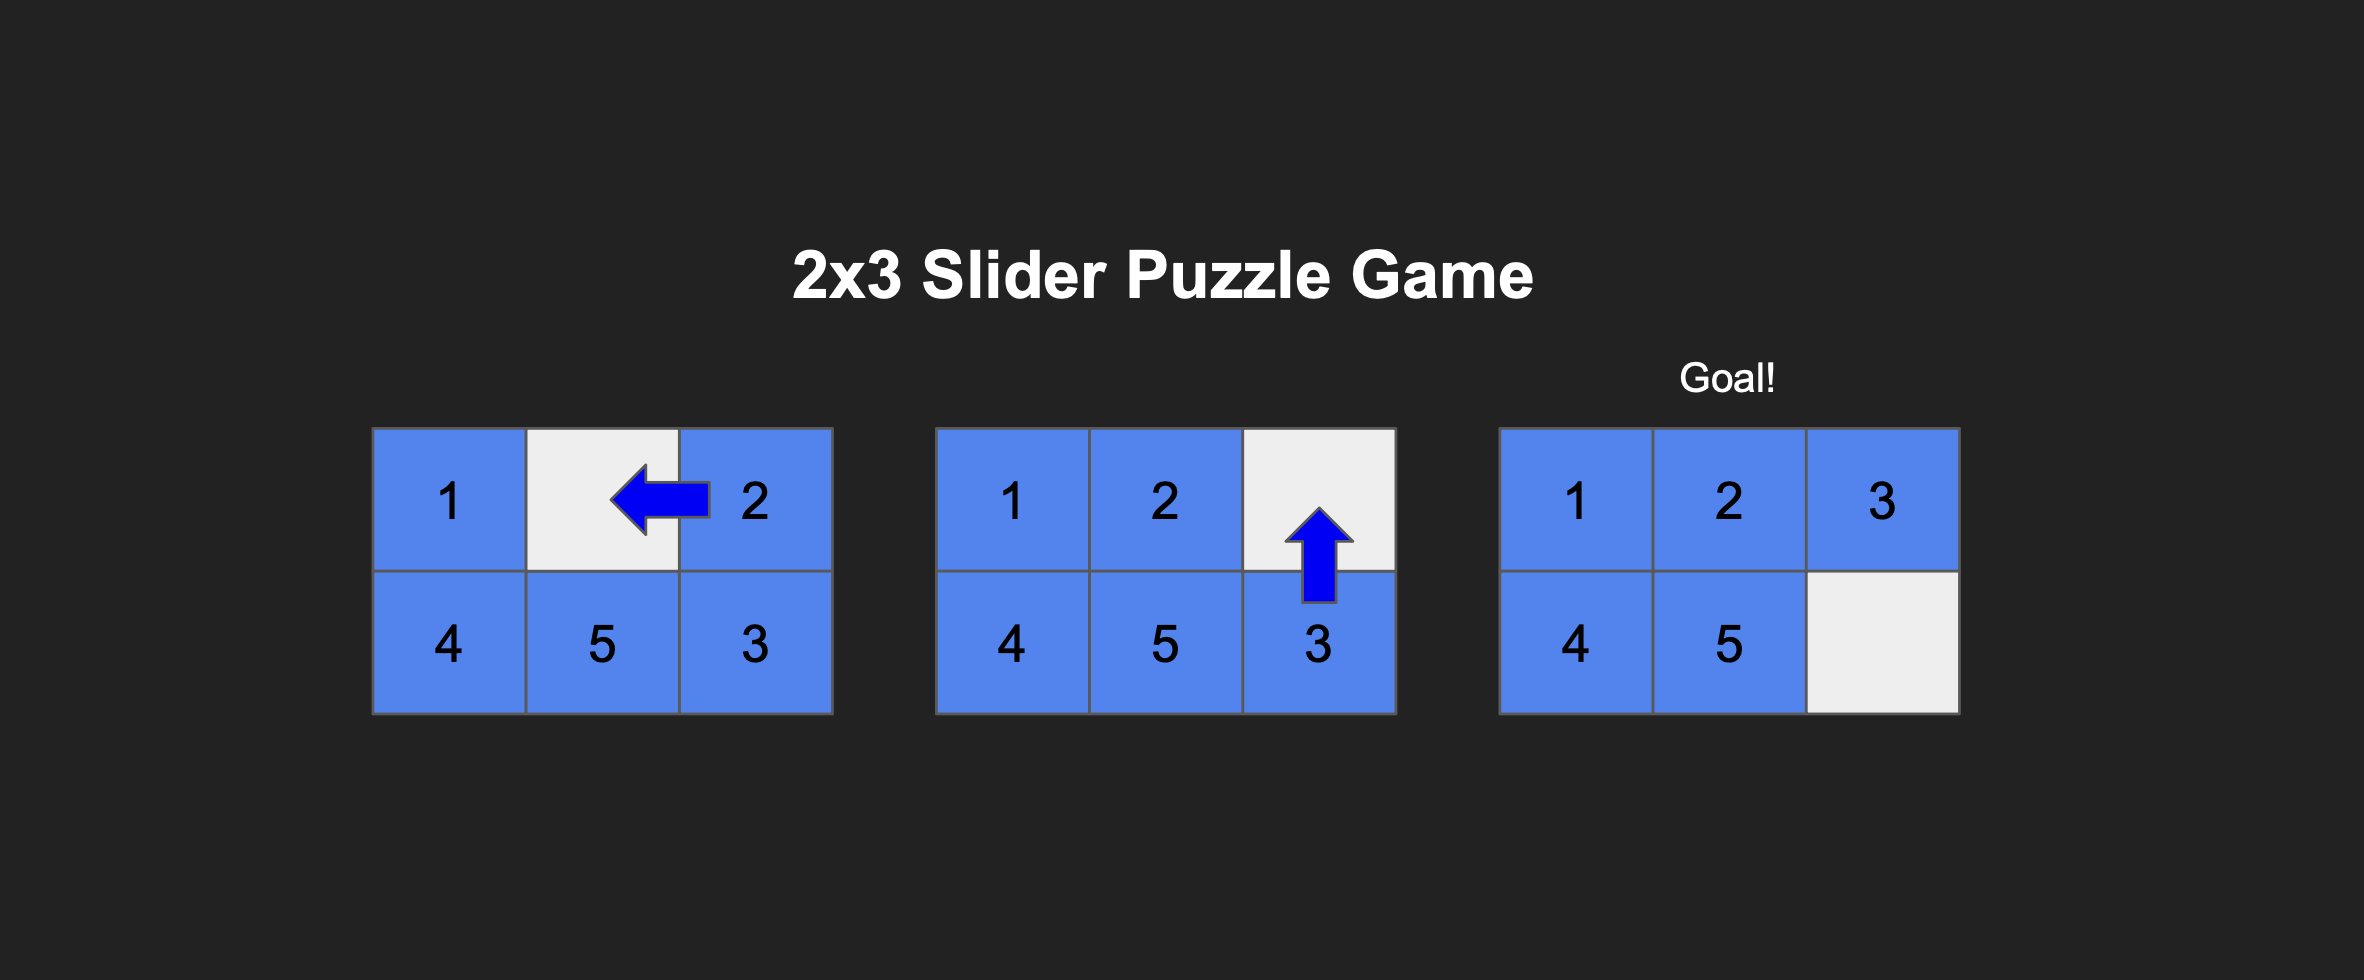

In [127]:
#Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import heapq
sns.set()
from IPython.display import Image
Image(filename='image.png')

### Problem Representation
Each state of the 2x3 puzzle is represented as a 2D NumPy array.
The blank tile is represented by 0. The objective is to rearrange the tiles so that they appear in ascending order from 1 to 5, with the 0 tile in the bottom-right corner.

### Helper Functions

**print_state(state, moved_tile=None)**

- Purpose: Prints visual representation of 2x3 puzzle grid. 

**get_neighbor(state)**

- Purpose: Generates all valid next states of the puzzle by sliding a tile into the empty space (0).
How it works:
    - Locates the blank (0) tile.
    - Checks if it can move up, down, left, or right.
    - Returns a list of tuples:(action, resulting_state_after_move)

**state_to_tuple(state)**
- Purpose: Converts the 2D NumPy array state into a hashable tuple, so it can be:
    - Stored in dictionaries (came_from, cost_so_far) since NumPy arrays can't be used as dictionary keys due to being mutable/unhashable
    - Used in sets and priority queues

##### **Summary of Movement Directions**

| Direction | Description                            | Visual Example (relative to blank) |
|-----------|----------------------------------------|-------------------------------------|
| `up`      | Moves the blank space **upward**       | blank swaps with tile above      |
| `down`    | Moves the blank space **downward**     | blank swaps with tile below      |
| `left`    | Moves the blank space **leftward**     | blank swaps with tile to the left|
| `right`   | Moves the blank space **rightward**    | blank swaps with tile to the right|


In [ ]:
# Function to visualise state (2D np array)
def print_state(state, title="", moved_tile=None):
    if title:
        print(f"\n{title}")
    
    for i in range(2):
        row = []
        for j in range(3):
            val = state[i, j]
            row.append(" " if val == 0 else str(val))
        print(", ".join(row))

# Function to convert state (2D NP array) to tuple 
def state_to_tuple(state):
    return tuple(state.flatten())

# Function to get all valid next states
def get_neighbors(state):
    neighbors = []
    x, y = np.argwhere(state == 0)[0]
    
    moves = {
        "up":    (x - 1, y),
        "down":  (x + 1, y),
        "left":  (x, y - 1),
        "right": (x, y + 1)
    }
    
    for action, (nx, ny) in moves.items():
        if 0 <= nx < 2 and 0 <= ny < 3:
            new_state = state.copy()
            new_state[x, y], new_state[nx, ny] = new_state[nx, ny], new_state[x, y]
            neighbors.append((action, new_state))
    
    return neighbors

### Defining Initial and Goal States 

In [115]:
INITIAL_STATE = np.array([
    [5, 4, 2], 
    [1, 3, 0]
])

GOAL_STATE = np.array([
    [1, 2, 3],
    [4, 5, 0]
])

print_state(INITIAL_STATE, "Initial State: ")
print_state(GOAL_STATE, "Goal State: ")


Initial State: 
5, 4, 2
1, 3,  

Goal State: 
1, 2, 3
4, 5,  


# Solutions
We solved this problem using 7 algorithms: 
- Uninformed search algorithms: `breadth_first_search`, `uniform_cost_search`, `depth_first_search`, `depth_limited_search` and `iterative_deepening_search` 
- Informed search* algorithms: `greedy_search`, `astar_search` 

## Uninformed Search Algorithms

### Breadth First Search

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [ ]:
from collections import deque

# --- BFS Implementation --- #
def slidingPuzzleBFS_np(initial_state, goal_state):
    """
    Solve a 6-tile sliding puzzle (2x3 board) using Breadth-First Search (BFS).
    States are represented as NumPy arrays.
    """
    # Convert initial and goal states to tuples
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    # If initial state is goal, return 0 moves
    if start == target:
        print("BFS: Already at goal!")
        return 0
    
    # Initialise things 
    visited = set([start])              # Set to track visited states
    q = deque([(initial_state, 0, [])]) # Queue for BFS (stores state, number of moves, path)
    states_explored = 0                 # counter for visited states

    # Perform BFS
    while q:
        state, moves, path = q.popleft()
        states_explored += 1

        # If the current state is the goal, return the number of moves and the solution path
        if state_to_tuple(state) == target:
            print(f"BFS solution found: {moves} moves")
            print(f"BFS total states explored: {states_explored}")
            
            # Print the solution path 
            print_state(initial_state, title="Step 0: Initial State")
            for step, (action, s) in enumerate(path):
                print_state(s, title=f"Step {step + 1}: Move empty space {action}")
            return moves
        
        # Explore all neighbors
        for action, neighbor_state in get_neighbors(state):
            tup = state_to_tuple(neighbor_state)
            if tup not in visited:
                visited.add(tup)
                q.append((neighbor_state, moves + 1, path + [(action, neighbor_state)]))
    
    # If no solution found, return -1
    print(f"BFS: Unsolvable. Total states explored: {states_explored}")
    return -1

# --- BFS Testing --- #

print("\n===== SLIDING PUZZLE BFS TEST =====")
bfs_moves = slidingPuzzleBFS_np(INITIAL_STATE, GOAL_STATE)


===== SLIDING PUZZLE BFS TEST =====
BFS solution found: 8 moves
BFS total states explored: 53

Step 0: Initial State
5, 4, 2
1, 3,  

Step 1: Move empty space left
5, 4, 2
1,  , 3

Step 2: Move empty space up
5,  , 2
1, 4, 3

Step 3: Move empty space left
 , 5, 2
1, 4, 3

Step 4: Move empty space down
1, 5, 2
 , 4, 3

Step 5: Move empty space right
1, 5, 2
4,  , 3

Step 6: Move empty space up
1,  , 2
4, 5, 3

Step 7: Move empty space right
1, 2,  
4, 5, 3

Step 8: Move empty space down
1, 2, 3
4, 5,  


### Uniform Cost Search

**Uninformed Search** : UCS considers the path cost (cost from start) when selecting the next state. It uses a priority queue and selects the state in the frontier with the lowest path cost 

In [117]:
# --- UCS Implementation --- #

def uniform_cost_search(initial_state, goal_state): 

    # Convert the initial and goal states to tuples 
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    # If the initial state is already the goal, return 0 moves
    if start == target:
        print("UCS: Already at goal!")
        return 0
    
    # Initialise things 
    visited = set([start])
    frontier = []  # Priority queue for UCS (cost, state, path)
    heapq.heappush(frontier, (0, start, []))  # (cost, state, path)
    states_explored = 0
    
    # Perform UCS 
    while frontier:
        cost, state_tup, path = heapq.heappop(frontier)  # Pop least cost state
        state = np.array(state_tup).reshape(2, 3)
        states_explored += 1
        
        # If the current state is the goal, print the solution path
        if state_tup == target:
            print(f"UCS solution found: {cost} moves")
            print(f"UCS total states explored: {states_explored}")
            
            # Print the solution path with instructions
            print_state(initial_state, title="Step 0: Initial State")
            for step, (action, s) in enumerate(path):
                print_state(s, title=f"Step {step + 1}: Move empty space {action}")
            
            return cost
        
        # Explore all neighbors
        for action, neighbor_state in get_neighbors(state):
            tup = state_to_tuple(neighbor_state)
            
            if tup not in visited:
                visited.add(tup)
                heapq.heappush(frontier, (cost + 1, tup, path + [(action, neighbor_state)]))  # Add neighbor to frontier
    
    # If no solution is found, return -1
    print("UCS: Unsolvable puzzle.")
    print(f"UCS: Total states explored: {states_explored}")
    return -1, []

# --- Run the Test --- #
print("\n===== SLIDING PUZZLE UCS TEST =====")
ucs_moves = uniform_cost_search(INITIAL_STATE, GOAL_STATE)



===== SLIDING PUZZLE UCS TEST =====
UCS solution found: 8 moves
UCS total states explored: 49

Step 0: Initial State
5, 4, 2
1, 3,  

Step 1: Move empty space left
5, 4, 2
1,  , 3

Step 2: Move empty space up
5,  , 2
1, 4, 3

Step 3: Move empty space left
 , 5, 2
1, 4, 3

Step 4: Move empty space down
1, 5, 2
 , 4, 3

Step 5: Move empty space right
1, 5, 2
4,  , 3

Step 6: Move empty space up
1,  , 2
4, 5, 3

Step 7: Move empty space right
1, 2,  
4, 5, 3

Step 8: Move empty space down
1, 2, 3
4, 5,  


### Depth First Search

**Uninformed Search** : Focusses on the graph structure and not the *cost from start* or *distance from goal*.

In [118]:
# --- DFS Implementation --- #

def slidingPuzzleDFS_np(initial_state, goal_state):

    # Convert initial and goal states to tuples 
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    # If initial state = goal, return 0 moves
    if start == target:
        print("DFS: Already at goal!")
        return 0
    
    # Initialise things  to track visited states (using tuple for hashability)
    visited = set([start])          # Set to track visited states
    stack = [(initial_state, 0, [])]    # Stack for DFS (stores state, number of moves, path)
    states_explored = 0             # Counter for visited states

    # Perform DFS
    while stack:
        state, moves, path = stack.pop()
        states_explored += 1
        
        # If the current state is the goal, return the number of moves and the solution path
        if state_to_tuple(state) == target:
            print(f"DFS solution found: {moves}")
            print(f"DFS total states explored: {states_explored}")    
            print_state(initial_state, title="Step 0: Initial State")

             # Print the sequence of states and moves
            for step, (action, s) in enumerate(path):
                print_state(s, title=f"Step {step + 1}: Move empty space {action}")
            return moves
        
        # Explore all neighbors
        for action, neighbor_state in get_neighbors(state):
            tup = state_to_tuple(neighbor_state)
            if tup not in visited:
                visited.add(tup)
                stack.append((neighbor_state, moves + 1, path + [(action, neighbor_state)]))
    
    # If no solution is found, return -1
    print(f"DFS: Unsolvable. Total states explored: {states_explored}")
    return -1

# --- Run the Test --- #
print("\n===== SLIDING PUZZLE DFS TEST =====")
dfs_moves = slidingPuzzleDFS_np(INITIAL_STATE, GOAL_STATE)


===== SLIDING PUZZLE DFS TEST =====
DFS solution found: 138
DFS total states explored: 182

Step 0: Initial State
5, 4, 2
1, 3,  

Step 1: Move empty space left
5, 4, 2
1,  , 3

Step 2: Move empty space left
5, 4, 2
 , 1, 3

Step 3: Move empty space up
 , 4, 2
5, 1, 3

Step 4: Move empty space right
4,  , 2
5, 1, 3

Step 5: Move empty space right
4, 2,  
5, 1, 3

Step 6: Move empty space down
4, 2, 3
5, 1,  

Step 7: Move empty space left
4, 2, 3
5,  , 1

Step 8: Move empty space left
4, 2, 3
 , 5, 1

Step 9: Move empty space up
 , 2, 3
4, 5, 1

Step 10: Move empty space right
2,  , 3
4, 5, 1

Step 11: Move empty space right
2, 3,  
4, 5, 1

Step 12: Move empty space down
2, 3, 1
4, 5,  

Step 13: Move empty space left
2, 3, 1
4,  , 5

Step 14: Move empty space left
2, 3, 1
 , 4, 5

Step 15: Move empty space up
 , 3, 1
2, 4, 5

Step 16: Move empty space right
3,  , 1
2, 4, 5

Step 17: Move empty space right
3, 1,  
2, 4, 5

Step 18: Move empty space down
3, 1, 5
2, 4,  

Step 19: Move

### Depth Limited Search

In [119]:
def slidingPuzzleDLS_np(initial_state, goal_state, depth_limit):
    
    # Convert initial and goal states to tuples 
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    # If initial state = goal, return 0 moves
    if start == target:
        print("DLS: Already at goal!")
        return 0
    
    # Initialise things to track visited states (using tuple for hashability)
    visited = set([start])          # Set to track visited states
    stack = [(initial_state, 0, [])]    # Stack for DFS (stores state, number of moves, path)
    states_explored = 0             # Counter for visited states

    # Perform Depth-Limited Search
    while stack:
        state, moves, path = stack.pop()
        states_explored += 1
        
        # If the current state is the goal, return the number of moves and the solution path
        if state_to_tuple(state) == target:
            print(f"DLS solution found: {moves} moves")
            print(f"DLS total states explored: {states_explored}")
            print_state(initial_state, title="Step 0: Initial State") 
            
            # Print the sequence of states and moves
            for step, (action, s) in enumerate(path):
                print_state(s, title=f"Step {step + 1}: Move empty space {action}")
            return moves
        
        # Stop expanding further if we reached the depth limit
        if moves >= depth_limit:
            continue
        
        # Explore all neighbors
        for action, neighbor_state in get_neighbors(state):
            tup = state_to_tuple(neighbor_state)
            if tup not in visited:
                visited.add(tup)
                stack.append((neighbor_state, moves + 1, path + [(action, neighbor_state)]))    
                
    # If no solution is found within depth limit, return -1
    print(f"DLS: Unsolvable within depth limit. Total states explored: {states_explored}")
    return -1

# --- Run the Test --- #
depth_limit = 10  # Set an appropriate depth limit
print("\n===== SLIDING PUZZLE DLS TEST =====")
dls_moves = slidingPuzzleDLS_np(INITIAL_STATE, GOAL_STATE, depth_limit)


===== SLIDING PUZZLE DLS TEST =====
DLS solution found: 10 moves
DLS total states explored: 29

Step 0: Initial State
5, 4, 2
1, 3,  

Step 1: Move empty space left
5, 4, 2
1,  , 3

Step 2: Move empty space left
5, 4, 2
 , 1, 3

Step 3: Move empty space up
 , 4, 2
5, 1, 3

Step 4: Move empty space right
4,  , 2
5, 1, 3

Step 5: Move empty space down
4, 1, 2
5,  , 3

Step 6: Move empty space left
4, 1, 2
 , 5, 3

Step 7: Move empty space up
 , 1, 2
4, 5, 3

Step 8: Move empty space right
1,  , 2
4, 5, 3

Step 9: Move empty space right
1, 2,  
4, 5, 3

Step 10: Move empty space down
1, 2, 3
4, 5,  


### Iterative Deepening Search 

In [120]:
def slidingPuzzleIDS(initial_state, goal_state, max_depth):
    
    # Convert initial and goal states to tuples 
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    # If initial state = goal, return 0 moves
    if start == target:
        print("IDS: Already at goal!")
        return 0

    # Perform Iterative Deepening Search
    for depth in range(1, max_depth + 1):
        print(f"\nSearching with Depth Limit = {depth}...")
        
        result = slidingPuzzleDLS_np(initial_state, goal_state, depth)
        
        # If solution found within the current depth limit, return the result
        if result != -1:
            return result
    
    # If no solution is found within the max depth limit
    print(f"Unsolvable within depth limit {max_depth}")
    return -1


# --- Run the Test --- #
max_depth = 10  # Set the maximum depth limit for IDS
print("\n===== SLIDING PUZZLE IDS TEST =====")
ids_moves = slidingPuzzleIDS(INITIAL_STATE, GOAL_STATE, max_depth)



===== SLIDING PUZZLE IDS TEST =====

Searching with Depth Limit = 1...
DLS: Unsolvable within depth limit. Total states explored: 3

Searching with Depth Limit = 2...
DLS: Unsolvable within depth limit. Total states explored: 6

Searching with Depth Limit = 3...
DLS: Unsolvable within depth limit. Total states explored: 11

Searching with Depth Limit = 4...
DLS: Unsolvable within depth limit. Total states explored: 17

Searching with Depth Limit = 5...
DLS: Unsolvable within depth limit. Total states explored: 24

Searching with Depth Limit = 6...
DLS: Unsolvable within depth limit. Total states explored: 34

Searching with Depth Limit = 7...
DLS: Unsolvable within depth limit. Total states explored: 46

Searching with Depth Limit = 8...
DLS: Unsolvable within depth limit. Total states explored: 56

Searching with Depth Limit = 9...
DLS: Unsolvable within depth limit. Total states explored: 59

Searching with Depth Limit = 10...
DLS solution found: 10 moves
DLS total states explored: 

## Informed Search Algorithms

### Heuristic Function with Manhatten Distance - For A*Star

In informed search algorithms, a heuristic function estimates the cost from the current state to the goal. One common and effective heuristic for grid-based problems is the Manhattan Distance. The Manhattan Distance is the total number of horizontal and vertical moves required to reach from one point to another in a grid.

For two points **A(x₁, y₁) and B(x₂, y₂) on a 2D grid**, the Manhattan Distance is calculated as:

**ManhattanDistance(A, B) = |x1-x2| + |y1-y2|**

#### In the context of a 2x3 sliding tile puzzle:

- Each tile has a goal position (where it should end up).
- The Manhattan Distance is calculated for each tile between its current position and its goal position.
- The heuristic value h(n) is the sum of all individual tile distances (excluding the blank tile).

This provides a good estimate of how far the current puzzle state is from the solution.

---

##### heuristic(state, goal)
**Purpose**: Calculates the Manhattan Distance heuristic between the current state and the goal.

**How it works**:
- For each tile in the grid (except 0), find its:
- Current position (x1, y1)
- Goal position (x2, y2)
- Compute the sum of abs(x1 - x2) + abs(y1 - y2) for all tiles.

In [121]:
def heuristic(state, goal):
    distance = 0
    for val in range(1, 6):  
        x1, y1 = np.where(state == val)
        x2, y2 = np.where(goal == val)
        distance += abs(x1[0] - x2[0]) + abs(y1[0] - y2[0])
    return distance

### Greedy Search

Greedy only considers the heuristic (Manhattan distance) when selecting the next state. It uses a priority queue and selects the state in the frontier with the lowest heuristic 

In [122]:
# --- Greedy Implementation --- #

def greedy_search(initial_state, goal_state):
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    if start == target:
        print("Greedy: Already at goal!")
        return 0

    # Initialise things 
    visited = set([start])
    frontier = []  # Priority queue for greedy (heuristic, state, path)
    heapq.heappush(frontier, (heuristic(initial_state, goal_state), start, [])) # (heuristic, state, path)
    states_explored = 0
    moves = 0
    
    while frontier:
        heuristic_value, state_tup, path = heapq.heappop(frontier)  # Pop state with lowest heuristic
        state = np.array(state_tup).reshape(2, 3)
        states_explored += 1
        
        # If the current state is the goal, print the solution path
        if state_tup == target:
            moves = len(path)
            print(f"Greedy solution found: {moves} moves")
            print(f"Greedy total states explored: {states_explored}")

            # Print the sequence of states and moves
            print_state(initial_state, title="Step 0: Initial State")
            for step, (action, s) in enumerate(path):
                print_state(s, title=f"Step {step + 1}: Move empty space {action}")
            return moves
        
        # Explore neighbors
        for action, neighbor_state in get_neighbors(state):
            tup = state_to_tuple(neighbor_state)
            
            if tup not in visited:
                visited.add(tup)
                heapq.heappush(frontier, (heuristic(neighbor_state, goal_state), tup, path + [(action, neighbor_state)]))
    
    # If no solution is found, return -1
    print("Greedy: Unsolvable puzzle.")
    print(f"Greedy: Total states explored: {states_explored}")
    return -1

print("\n===== SLIDING PUZZLE GREEDY TEST =====")
greedy_moves = greedy_search(INITIAL_STATE, GOAL_STATE)



===== SLIDING PUZZLE GREEDY TEST =====
Greedy solution found: 8 moves
Greedy total states explored: 9

Step 0: Initial State
5, 4, 2
1, 3,  

Step 1: Move empty space left
5, 4, 2
1,  , 3

Step 2: Move empty space up
5,  , 2
1, 4, 3

Step 3: Move empty space left
 , 5, 2
1, 4, 3

Step 4: Move empty space down
1, 5, 2
 , 4, 3

Step 5: Move empty space right
1, 5, 2
4,  , 3

Step 6: Move empty space up
1,  , 2
4, 5, 3

Step 7: Move empty space right
1, 2,  
4, 5, 3

Step 8: Move empty space down
1, 2, 3
4, 5,  


### A* Search 

A* search considered both the path cost and the heuristic when selecting the next state. It uses a priority queue and selects the state in the frontier with the lowest sum of path cost g(n) and heuristic h(n)

In [123]:
# --- A* Implementation --- #

def a_star_search(initial_state, goal_state):
    start = state_to_tuple(initial_state)
    target = state_to_tuple(goal_state)
    
    if start == target:
        print("A*: Already at goal!")
        return 0

    # Initialise things 
    visited = set([start])
    frontier = []  # Priority queue for A* (f(n), state, g(n), path)
    heapq.heappush(frontier, (heuristic(initial_state, goal_state), start, 0, []))  # (f(n), state, g(n), path)
    states_explored = 0
    moves = 0
    
    while frontier:
        f_value, state_tup, g_value, path = heapq.heappop(frontier)  # Pop state with lowest f(n) = g(n) + h(n)
        state = np.array(state_tup).reshape(2, 3)
        states_explored += 1
        
        # If the current state is the goal, print the solution path
        if state_tup == target:
            moves = len(path)
            print(f"A* solution found: {moves} moves")
            print(f"A* total states explored: {states_explored}")

            # Print the sequence of states and moves
            print_state(initial_state, title="Step 0: Initial State")
            for step, (action, s) in enumerate(path):
                print_state(s, title=f"Step {step + 1}: Move empty space {action}")
                moves += 1  # Add 1 for each step in the path
                
            return moves
        
        # Explore neighbors
        for action, neighbor_state in get_neighbors(state):
            tup = state_to_tuple(neighbor_state)
            
            if tup not in visited:
                visited.add(tup)
                g_new = g_value + 1  # Increment the cost from the start by 1 move
                f_new = g_new + heuristic(neighbor_state, goal_state)  # f(n) = g(n) + h(n)
                heapq.heappush(frontier, (f_new, tup, g_new, path + [(action, neighbor_state)]))
    
    # If no solution is found, return -1
    print("A*: Unsolvable puzzle.")
    print(f"A*: Total states explored: {states_explored}")
    return -1

# --- Run the Test --- #

print("\n===== SLIDING PUZZLE A* TEST =====")
a_star_moves = a_star_search(INITIAL_STATE, GOAL_STATE)



===== SLIDING PUZZLE A* TEST =====
A* solution found: 8 moves
A* total states explored: 9

Step 0: Initial State
5, 4, 2
1, 3,  

Step 1: Move empty space left
5, 4, 2
1,  , 3

Step 2: Move empty space up
5,  , 2
1, 4, 3

Step 3: Move empty space left
 , 5, 2
1, 4, 3

Step 4: Move empty space down
1, 5, 2
 , 4, 3

Step 5: Move empty space right
1, 5, 2
4,  , 3

Step 6: Move empty space up
1,  , 2
4, 5, 3

Step 7: Move empty space right
1, 2,  
4, 5, 3

Step 8: Move empty space down
1, 2, 3
4, 5,  


## Insights

| Algorithm   | # Moves in Solution | # States Explored |
|-------------|---------------------|-------------------|
| BFS         | 8                   | 53                |
| UCS         | 8                   | 49                |
| DFS         | 138                 | 182               |
| DLS         | 10                  | 29                |
| IDS         | 10                  | 29                |
| Greedy      | 8                   | 9                 |
| A*          | 8                   | 9                 |


**Optimal Solutions (#Moves in Solution):**
- BFS, UCS, Greedy, and A* are all able to find the optimal solution path (involves only 8 tile moves) 
- DFS, on the other hand, returns a solution path with 138 moves, likely because it explored deep branches and missed out on other more optimal solutions.
- IDS and DLS both returned 10 moves. Although it is suboptimal, the depth limits helped them avoid going deep down a branch unlike DFS, and in this case they found a better solution.

**Efficiency of Search (#States Explored):**

- Greedy and A* each explore 9 states, making them very efficient. This is due to the use of a good heuristic (Manhatten distance) that guides the search quickly towards the goal. Although they find the optimal solution in this case, in different puzzles, the heuristics might lead them to suboptimal paths. 
- BFS and UCS explore 53 and 49 states respectively. The state count is reasonable since BFS explores all states layer by layer, and UCS explores states based on path cost. These two algorithms ensure an optimal solution is found, and hence will naturally explores a wider set of states than Greedy and A*. 
- DFS explores 182 states, much more than any of the other algorithms. It may explore a long path to a dead end or revisit already explored states in different orders, leading to high inefficiency
- IDS and DLS each explore 29 states, which is significantly fewer than DFS. This is significantly fewer than DFS due to the limit on depth placed which prevents it from exploring an overly long path.  